In [1]:
#Importing the required libraries
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
import random

In [2]:
#reading the data
train = pd.read_csv('D:/Vibhor/analytics vidya/project 1- classification/Train_pjb2QcD.csv',index_col = 'ID')
test = pd.read_csv('D:/Vibhor/analytics vidya/project 1- classification/Test_wyCirpO.csv',index_col = 'ID')

In [3]:
train_length = train.shape[0]
test_length = test.shape[0]

In [4]:
train.dtypes

Office_PIN                       int64
Application_Receipt_Date        object
Applicant_City_PIN             float64
Applicant_Gender                object
Applicant_BirthDate             object
Applicant_Marital_Status        object
Applicant_Occupation            object
Applicant_Qualification         object
Manager_DOJ                     object
Manager_Joining_Designation     object
Manager_Current_Designation     object
Manager_Grade                  float64
Manager_Status                  object
Manager_Gender                  object
Manager_DoB                     object
Manager_Num_Application        float64
Manager_Num_Coded              float64
Manager_Business               float64
Manager_Num_Products           float64
Manager_Business2              float64
Manager_Num_Products2          float64
Business_Sourced                 int64
dtype: object

In [5]:
cleanup_nums={'Applicant_Gender':{'M':1,'F':0},'Manager_Gender':{'M':1,'F':0},'Applicant_Marital_Status':{'S':0,'M':1,'W':2,'D':3},
             'Applicant_Occupation':{'Others':0,'Salaried':1,'Business':2,'Self Employed':3,'Student':4},
             'Applicant_Qualification':{'Others':0,'Class XII':1,'Class X':2,'Graduate':3,'Masters of Business Administration':4,'Associate / Fellow of Institute of Chartered Accountans of India':5,
                                       'Associate/Fellow of Institute of Company Secretories of India':6,'Associate/Fellow of Acturial Society of India':7,'Certified Associateship of Indian Institute of Bankers':8,
                                       'Associate/Fellow of Insurance Institute of India':9,'Professional Qualification in Marketing':10,'Associate/Fellow of Institute of Institute of Costs and Works Accountants of India':11},
              'Manager_Joining_Designation':{'Other':0,'Level 1':1,'Level 2':2,'Level 3':3,'Level 4':4,'Level 5':5,'Level 6':6,'Level 7':7},
              'Manager_Current_Designation':{'Other':0,'Level 1':1,'Level 2':2,'Level 3':3,'Level 4':4,'Level 5':5,'Level 6':6,'Level 7':7},
              'Manager_Status':{'Probation':0,'Confirmation':1}
             }

In [6]:
train.replace(cleanup_nums ,inplace=True)

In [7]:
test.replace(cleanup_nums ,inplace=True)

In [8]:
train['Applicant_Gender'].value_counts()

1.0    7179
0.0    2281
Name: Applicant_Gender, dtype: int64

In [9]:
train['Manager_Gender'].value_counts()

1.0    7627
0.0    1217
Name: Manager_Gender, dtype: int64

In [10]:
train['Applicant_Marital_Status'].value_counts()

1.0    6177
0.0    3267
2.0       6
3.0       4
Name: Applicant_Marital_Status, dtype: int64

In [11]:
train['Applicant_Occupation'].value_counts()

1.0    3787
2.0    2303
0.0    1966
3.0     149
4.0     101
Name: Applicant_Occupation, dtype: int64

In [12]:
train['Applicant_Qualification'].value_counts()

1.0     5806
3.0     3196
2.0      225
0.0      132
4.0       74
5.0        3
9.0        1
10.0       1
8.0        1
7.0        1
6.0        1
Name: Applicant_Qualification, dtype: int64

In [13]:
train['Manager_Current_Designation'].value_counts()

2.0    3208
1.0    2479
3.0    2033
4.0    1031
5.0      93
Name: Manager_Current_Designation, dtype: int64

In [14]:
train['Manager_Status'].value_counts()

1.0    5277
0.0    3567
Name: Manager_Status, dtype: int64

In [15]:
train['Applicant_City_PIN']=train['Applicant_City_PIN'].ffill().bfill()
train['Applicant_Gender']=train['Applicant_Gender'].ffill().bfill()
train['Applicant_BirthDate']=train['Applicant_BirthDate'].ffill().bfill()
train['Applicant_Marital_Status']=train['Applicant_Marital_Status'].ffill().bfill()
train['Applicant_Occupation']=train['Applicant_Occupation'].ffill().bfill()
train['Applicant_Qualification']=train['Applicant_Qualification'].ffill().bfill()
train['Manager_DOJ']=train['Manager_DOJ'].ffill().bfill()
train['Manager_Joining_Designation']=train['Manager_Joining_Designation'].ffill().bfill()
train['Manager_Current_Designation']=train['Manager_Current_Designation'].ffill().bfill()
train['Manager_Grade']=train['Manager_Grade'].ffill().bfill()
train['Manager_Status']=train['Manager_Status'].ffill().bfill()
train['Manager_Gender']=train['Manager_Gender'].ffill().bfill()
train['Manager_DoB']=train['Manager_DoB'].ffill().bfill()
train['Manager_Num_Application']=train['Manager_Num_Application'].ffill().bfill()
train['Manager_Business']=train['Manager_Business'].fillna(np.mean(train['Manager_Business']))
train['Manager_Num_Products']=train['Manager_Num_Products'].ffill().bfill()
train['Manager_Business2']=train['Manager_Business2'].fillna(np.mean(train['Manager_Business2']))
train['Manager_Num_Products2']=train['Manager_Num_Products2'].ffill().bfill()
train['Manager_Num_Coded']=train['Manager_Num_Coded'].ffill().bfill()

In [16]:
test['Applicant_City_PIN']=test['Applicant_City_PIN'].ffill().bfill()
test['Applicant_Gender']=test['Applicant_Gender'].ffill().bfill()
test['Applicant_BirthDate']=test['Applicant_BirthDate'].ffill().bfill()
test['Applicant_Marital_Status']=test['Applicant_Marital_Status'].ffill().bfill()
test['Applicant_Occupation']=test['Applicant_Occupation'].ffill().bfill()
test['Applicant_Qualification']=test['Applicant_Qualification'].ffill().bfill()
test['Manager_DOJ']=test['Manager_DOJ'].ffill().bfill()
test['Manager_Joining_Designation']=test['Manager_Joining_Designation'].ffill().bfill()
test['Manager_Current_Designation']=test['Manager_Current_Designation'].ffill().bfill()
test['Manager_Grade']=test['Manager_Grade'].ffill().bfill()
test['Manager_Status']=test['Manager_Status'].ffill().bfill()
test['Manager_Gender']=test['Manager_Gender'].ffill().bfill()
test['Manager_DoB']=test['Manager_DoB'].ffill().bfill()
test['Manager_Num_Application']=test['Manager_Num_Application'].ffill().bfill()
test['Manager_Business']=test['Manager_Business'].fillna(np.mean(test['Manager_Business']))
test['Manager_Num_Products']=test['Manager_Num_Products'].ffill().bfill()
test['Manager_Business2']=test['Manager_Business2'].fillna(np.mean(test['Manager_Business2']))
test['Manager_Num_Products2']=test['Manager_Num_Products2'].ffill().bfill()
test['Manager_Num_Coded']=test['Manager_Num_Coded'].ffill().bfill()

In [17]:
train.columns[train.isna().any()].tolist()

[]

In [18]:
train.loc[train['Manager_Business']>650000,'Manager_Business']=np.mean(train['Manager_Business'])

{'whiskers': [<matplotlib.lines.Line2D at 0xb583f90>,
 'caps': [<matplotlib.lines.Line2D at 0xb5974b0>,
 'boxes': [<matplotlib.lines.Line2D at 0xb583d10>],
 'medians': [<matplotlib.lines.Line2D at 0xb597a10>],
 'fliers': [<matplotlib.lines.Line2D at 0xb597c50>],
 'means': []}

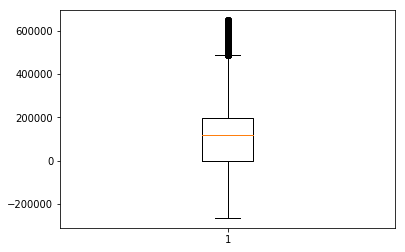

In [19]:
plt.boxplot(train['Manager_Business'])

In [20]:
train.loc[train['Manager_Business2']>500000,'Manager_Business2']=np.mean(train['Manager_Business2'])

{'whiskers': [<matplotlib.lines.Line2D at 0xb5e7e70>,
 'caps': [<matplotlib.lines.Line2D at 0xb6703b0>,
 'boxes': [<matplotlib.lines.Line2D at 0xb5e7bf0>],
 'medians': [<matplotlib.lines.Line2D at 0xb6708d0>],
 'fliers': [<matplotlib.lines.Line2D at 0xb670b10>],
 'means': []}

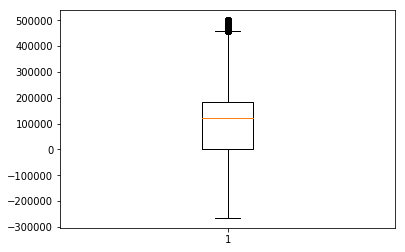

In [21]:
plt.boxplot(train['Manager_Business2'])

In [22]:
train.head()

,Office_PIN,Application_Receipt_Date,Applicant_City_PIN,Applicant_Gender,Applicant_BirthDate,Applicant_Marital_Status,Applicant_Occupation,Applicant_Qualification,Manager_DOJ,Manager_Joining_Designation,...,Manager_Status,Manager_Gender,Manager_DoB,Manager_Num_Application,Manager_Num_Coded,Manager_Business,Manager_Num_Products,Manager_Business2,Manager_Num_Products2,Business_Sourced
ID,,,,,,,,,,,,,,,,,,,,,
FIN1000001,842001,4/16/2007,844120.0,1.0,12/19/1971,1.0,0.0,3.0,11/10/2005,1.0,...,1.0,1.0,2/17/1978,2.0,1.0,335249.0,28.0,335249.0,28.0,0
FIN1000002,842001,4/16/2007,844111.0,1.0,2/17/1983,0.0,0.0,1.0,11/10/2005,1.0,...,1.0,1.0,2/17/1978,2.0,1.0,335249.0,28.0,335249.0,28.0,1
FIN1000003,800001,4/16/2007,844101.0,1.0,1/16/1966,1.0,2.0,1.0,5/27/2006,1.0,...,1.0,1.0,3/3/1969,0.0,0.0,357184.0,24.0,357184.0,24.0,0
FIN1000004,814112,4/16/2007,814112.0,1.0,2/3/1988,0.0,1.0,1.0,8/21/2003,1.0,...,1.0,0.0,8/14/1978,0.0,0.0,318356.0,22.0,318356.0,22.0,0
FIN1000005,814112,4/16/2007,815351.0,1.0,7/4/1985,1.0,0.0,1.0,5/8/2006,1.0,...,1.0,1.0,2/7/1971,2.0,1.0,230402.0,17.0,230402.0,17.0,0


In [23]:
test.head()

,Office_PIN,Application_Receipt_Date,Applicant_City_PIN,Applicant_Gender,Applicant_BirthDate,Applicant_Marital_Status,Applicant_Occupation,Applicant_Qualification,Manager_DOJ,Manager_Joining_Designation,...,Manager_Grade,Manager_Status,Manager_Gender,Manager_DoB,Manager_Num_Application,Manager_Num_Coded,Manager_Business,Manager_Num_Products,Manager_Business2,Manager_Num_Products2
ID,,,,,,,,,,,,,,,,,,,,,
FIN1009528,284001,7/2/2008,284001.0,1.0,8/5/1982,0.0,1.0,3.0,5/26/2008,1.0,...,2.0,0.0,0.0,10/14/1978,1.0,0.0,0.000000,0.0,0.000000,0.0
FIN1009529,800001,7/2/2008,800026.0,1.0,3/11/1968,1.0,1.0,3.0,6/24/2008,1.0,...,2.0,0.0,1.0,3/3/1971,2.0,0.0,0.000000,0.0,0.000000,0.0
FIN1009530,800001,7/2/2008,800026.0,1.0,12/16/1984,0.0,1.0,3.0,6/24/2008,1.0,...,2.0,0.0,1.0,3/3/1971,2.0,0.0,111542.522625,0.0,98950.730633,0.0
FIN1009531,800001,7/2/2008,844112.0,1.0,6/7/1971,0.0,1.0,3.0,6/24/2008,1.0,...,2.0,0.0,1.0,3/3/1971,2.0,0.0,111542.522625,0.0,98950.730633,0.0
FIN1009532,533101,7/2/2008,533102.0,1.0,7/22/1978,0.0,1.0,4.0,12/4/2007,2.0,...,3.0,1.0,1.0,6/23/1977,4.0,1.0,97352.000000,3.0,97352.000000,3.0


In [24]:
x_train=train.drop(['Business_Sourced','Application_Receipt_Date','Applicant_BirthDate','Manager_DOJ','Manager_DoB'],axis=1)

In [25]:
y_train=train['Business_Sourced']

In [26]:
x_train.head()

,Office_PIN,Applicant_City_PIN,Applicant_Gender,Applicant_Marital_Status,Applicant_Occupation,Applicant_Qualification,Manager_Joining_Designation,Manager_Current_Designation,Manager_Grade,Manager_Status,Manager_Gender,Manager_Num_Application,Manager_Num_Coded,Manager_Business,Manager_Num_Products,Manager_Business2,Manager_Num_Products2
ID,,,,,,,,,,,,,,,,,
FIN1000001,842001,844120.0,1.0,1.0,0.0,3.0,1.0,2.0,3.0,1.0,1.0,2.0,1.0,335249.0,28.0,335249.0,28.0
FIN1000002,842001,844111.0,1.0,0.0,0.0,1.0,1.0,2.0,3.0,1.0,1.0,2.0,1.0,335249.0,28.0,335249.0,28.0
FIN1000003,800001,844101.0,1.0,1.0,2.0,1.0,1.0,1.0,2.0,1.0,1.0,0.0,0.0,357184.0,24.0,357184.0,24.0
FIN1000004,814112,814112.0,1.0,0.0,1.0,1.0,1.0,3.0,4.0,1.0,0.0,0.0,0.0,318356.0,22.0,318356.0,22.0
FIN1000005,814112,815351.0,1.0,1.0,0.0,1.0,1.0,1.0,2.0,1.0,1.0,2.0,1.0,230402.0,17.0,230402.0,17.0


In [27]:
test=test.drop(['Application_Receipt_Date','Applicant_BirthDate','Manager_DOJ','Manager_DoB'],axis=1)

In [28]:
test.head()

,Office_PIN,Applicant_City_PIN,Applicant_Gender,Applicant_Marital_Status,Applicant_Occupation,Applicant_Qualification,Manager_Joining_Designation,Manager_Current_Designation,Manager_Grade,Manager_Status,Manager_Gender,Manager_Num_Application,Manager_Num_Coded,Manager_Business,Manager_Num_Products,Manager_Business2,Manager_Num_Products2
ID,,,,,,,,,,,,,,,,,
FIN1009528,284001,284001.0,1.0,0.0,1.0,3.0,1.0,1.0,2.0,0.0,0.0,1.0,0.0,0.000000,0.0,0.000000,0.0
FIN1009529,800001,800026.0,1.0,1.0,1.0,3.0,1.0,1.0,2.0,0.0,1.0,2.0,0.0,0.000000,0.0,0.000000,0.0
FIN1009530,800001,800026.0,1.0,0.0,1.0,3.0,1.0,1.0,2.0,0.0,1.0,2.0,0.0,111542.522625,0.0,98950.730633,0.0
FIN1009531,800001,844112.0,1.0,0.0,1.0,3.0,1.0,1.0,2.0,0.0,1.0,2.0,0.0,111542.522625,0.0,98950.730633,0.0
FIN1009532,533101,533102.0,1.0,0.0,1.0,4.0,2.0,2.0,3.0,1.0,1.0,4.0,1.0,97352.000000,3.0,97352.000000,3.0


In [29]:
from sklearn.tree import DecisionTreeClassifier

In [30]:
logreg=DecisionTreeClassifier(min_samples_split=170)

In [31]:
logreg.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=170,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [32]:
pred=logreg.predict(test)

In [33]:
logreg.score(x_train,y_train)

0.6894090479689304

In [34]:
test_Business_Sourced=pred

In [35]:
result={'ID':test.index,'Business_Sourced':pred}
output=pd.DataFrame(result)

In [36]:
output['Business_Sourced'].value_counts()

0    3961
1    1084
Name: Business_Sourced, dtype: int64

In [37]:
output.to_csv('D:/Vibhor/analytics vidya/project 1- classification/sample_submission.csv',index=False)